In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
data = pd.read_excel("dummy_data.xlsx")
data

,No.,Nama Mahasiswa,NIM,IPK,Dosen PA,Mata kuliah mengulang,Jenis mata kuliah,SKS,PRIORITY
0,1,Puspitasari,11190910000003,3.42,"Anif Hanifa Setianingrum, M.Si",PENDIDIKAN PANCASILA DAN KEWARGANEGARAAN,Nasional,3,TINGGI
1,2,Awiez Fathwa Zein,11190910000005,3.31,"Andrew Fiade, M.Kom",MATEMATIKA DISKRIT,Rumpun Ilmu Formal,4,SEDANG
2,3,Raffyanda Riskaputra,11190910000006,3.23,"Dr. Imam Marzuki Shofi, M.T.",SISTEM BASIS DATA,Rumpun Ilmu Komputer,4,SEDANG
3,4,Anugrah Pramesta,11190910000007,3.46,"Nenny Anggraini, S.Kom, M.T.",BAHASA ARAB,Universitas,3,TINGGI
4,5,Muhammad Arya Dhika,11190910000008,3.54,"Siti Ummie Masruroh, M.Sc.",METODE NUMERIK,Program Studi,3,RENDAH
5,6,Mutmainnah,11190910000009,3.51,"Luh Kesuma Wardhani, M.T.",ISLAM DAN ILMU PENGETAHUAN,Universitas,3,TINGGI
6,7,Zaki Putrama,11190910000010,3.28,"Andrew Fiade, M.Kom",STATISTIKA ELEMENTER,Fakultas,3,SEDANG
7,8,Wahyu Ramadhani,11190910000011,3.55,"Andrew Fiade, M.Kom",STRUKTUR DATA DAN ALGORITMA,Program Studi,3,RENDAH
8,9,Iva Alfiyanti,11190910000012,3.37,"Nenny Anggraini, S.Kom, M.T.",BAHASA INDONESIA,Nasional,3,TINGGI
9,10,Aghni Syifa Ahmari,11190910000014,3.62,"Anif Hanifa Setianingrum, M.Si",KECERDASAN BUATAN,Program Studi,3,RENDAH


In [3]:
data_selection = data.copy()
data_selection = data_selection.drop('No.', axis=1)
data_selection = data_selection.drop('Nama Mahasiswa', axis=1)
data_selection = data_selection.drop('NIM', axis=1)
data_selection = data_selection.drop('IPK', axis=1)
data_selection = data_selection.drop('Dosen PA', axis=1)
data_selection = data_selection.drop('Mata kuliah mengulang', axis=1)
data_selection

,Jenis mata kuliah,SKS,PRIORITY
0,Nasional,3,TINGGI
1,Rumpun Ilmu Formal,4,SEDANG
2,Rumpun Ilmu Komputer,4,SEDANG
3,Universitas,3,TINGGI
4,Program Studi,3,RENDAH
5,Universitas,3,TINGGI
6,Fakultas,3,SEDANG
7,Program Studi,3,RENDAH
8,Nasional,3,TINGGI
9,Program Studi,3,RENDAH


In [4]:
matkul_mapping = {'Program Studi': 1,
                  'Rumpun Ilmu Komputer': 2,
                  'Rumpun Ilmu Formal': 3,
                  'Fakultas': 4,
                  'Universitas': 5,
                  'Nasional': 6
                 }

In [5]:
label_mapping = {'RENDAH': 1, 'SEDANG': 2, 'TINGGI': 3}

In [6]:
def preprocess_inputs(data):
    data = data.copy()
    X = data.drop('No.', axis=1)
    X = X.drop('Nama Mahasiswa', axis=1)
    X = X.drop('NIM', axis=1)
    X = X.drop('IPK', axis=1)
    X = X.drop('Dosen PA', axis=1)
    X = X.drop('Mata kuliah mengulang', axis=1)
    X = X.drop('PRIORITY', axis=1)
    X['Jenis mata kuliah'] = X['Jenis mata kuliah'].replace(matkul_mapping)
    data['PRIORITY'] = data['PRIORITY'].replace(label_mapping)
    y = data['PRIORITY']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
    return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [8]:
X_train

,Jenis mata kuliah,SKS
6,4,3
13,4,3
4,1,3
2,2,4
5,5,3
14,1,3
9,1,3
7,1,3
16,4,2
11,2,2


In [9]:
from sklearn import tree
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [10]:
y_pred = clf.predict(X_test)

In [11]:
print(y_test)

18    1
1     2
19    2
8     3
10    2
17    3
Name: PRIORITY, dtype: int64


In [12]:
print(y_pred)

[1 2 2 3 3 3]


In [13]:
accuracy_score(y_test, y_pred)

0.8333333333333334

In [14]:
from sklearn.metrics import classification_report
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

      RENDAH       1.00      1.00      1.00         1
      SEDANG       1.00      0.67      0.80         3
      TINGGI       0.67      1.00      0.80         2

    accuracy                           0.83         6
   macro avg       0.89      0.89      0.87         6
weighted avg       0.89      0.83      0.83         6



In [15]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=X_train.columns.values.tolist())
print(r)

|--- Jenis mata kuliah <= 4.50
|   |--- Jenis mata kuliah <= 3.00
|   |   |--- SKS <= 3.50
|   |   |   |--- class: 1
|   |   |--- SKS >  3.50
|   |   |   |--- class: 2
|   |--- Jenis mata kuliah >  3.00
|   |   |--- class: 2
|--- Jenis mata kuliah >  4.50
|   |--- class: 3



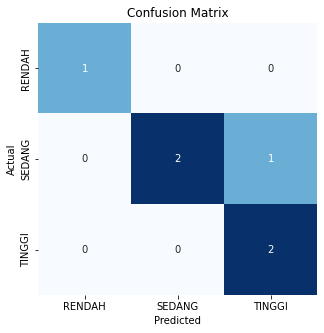

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

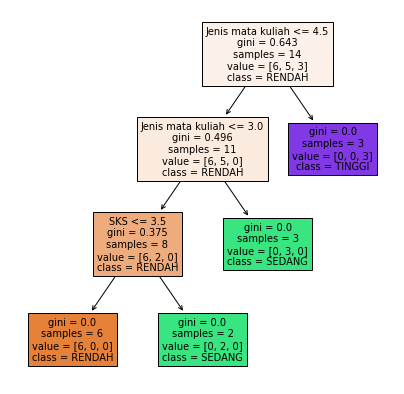

In [17]:
plt.figure(figsize=(7,7))
tree.plot_tree(clf,
               feature_names=X_train.columns.values.tolist(),
               class_names=list(label_mapping.keys()),
               filled = True)
plt.show()